<a href="https://colab.research.google.com/github/deamonknoppix/Python_Projects/blob/main/Weather_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [119]:
#NeuralProphet is the class we will use to predict the future temperature.
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt

In [120]:
df = pd.read_csv('Montreal_Weather.csv')
df.tail()

,date,max_temperature_v,min_temperature_v
0,2021-12-25,-2.38,-10.05
1,2020-12-25,-2.47,-10.20
2,2019-12-25,-2.77,-10.63
3,2018-12-25,-2.78,-10.70
4,2017-12-25,-2.46,-10.42


In [121]:
df.date.unique()

array(['2021-12-25', '2020-12-25', '2019-12-25', '2018-12-25',
       '2017-12-25'], dtype=object)

In [122]:
df.columns

Index(['date', 'max_temperature_v', 'min_temperature_v'], dtype='object')

In [123]:
df.dtypes

date                  object
max_temperature_v    float64
min_temperature_v    float64
dtype: object

In [183]:
df ['date'] = pd.to_datetime(df ['date'])
df.tail()

,date,max_temperature_v,min_temperature_v
0,2021-12-25,-2.38,-10.05
1,2020-12-25,-2.47,-10.20
2,2019-12-25,-2.77,-10.63
3,2018-12-25,-2.78,-10.70
4,2017-12-25,-2.46,-10.42


In [182]:
df.dtypes

date                 datetime64[ns]
max_temperature_v           float64
min_temperature_v           float64
dtype: object

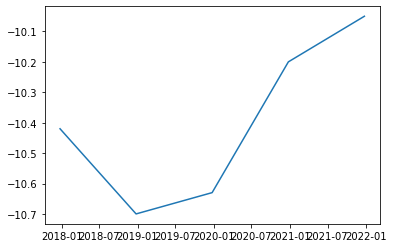

In [181]:
plt.plot(df ['date'], df ['min_temperature_v'])
plt.show()

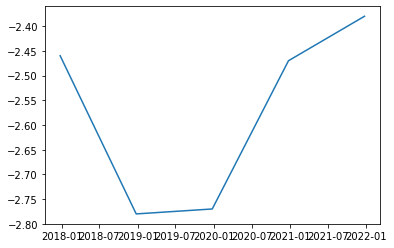

In [180]:
plt.plot(df ['date'], df ['max_temperature_v'])
plt.show()

Training the forecasting model

In [196]:
new_column = df[['date', 'min_temperature_v', 'max_temperature_v']] 
new_column.dropna(inplace=True)
new_column.columns = ['ds', 'y', 'z'] 
new_column.tail()

,ds,y,z
0,2021-12-25,-10.05,-2.38
1,2020-12-25,-10.20,-2.47
2,2019-12-25,-10.63,-2.77
3,2018-12-25,-10.70,-2.78
4,2017-12-25,-10.42,-2.46


ADDING A REGRESSOR (MULTIVARIATE APPROACH)

In [296]:
n = NeuralProphet()
n.add_future_regressor('z')
model = n.fit(new_column, freq='D',)

INFO - (NP.df_utils._infer_frequency) - Major frequency Y corresponds to 80.0% of the data.
INFO:NP.df_utils:Major frequency Y corresponds to 80.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency Y
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - A

  0%|          | 0/100 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.51E-02, min: 4.33E+00
INFO:NP.utils_torch:lr-range-test results: steep: 3.51E-02, min: 4.33E+00


  0%|          | 0/100 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.51E-02, min: 3.51E+00
INFO:NP.utils_torch:lr-range-test results: steep: 3.51E-02, min: 3.51E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.98E-02
INFO:NP.forecaster:lr-range-test selected learning rate: 4.98E-02
Epoch[1000/1000]: 100%|██████████| 1000/1000 [00:11<00:00, 86.50it/s, SmoothL1Loss=1.75e-5, MAE=0.003, RMSE=0.00367, Loss=1.13e-5, RegLoss=0]


FORECASTING THE TEMPERATURE

In [304]:
forecast = n.predict(new_column)
forecast.tail()

INFO - (NP.df_utils._infer_frequency) - Major frequency -365D corresponds to 60.0% of the data.
INFO:NP.df_utils:Major frequency -365D corresponds to 60.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency -365D corresponds to 60.0% of the data.
INFO:NP.df_utils:Major frequency -365D corresponds to 60.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,residual1,yhat1,trend,season_yearly,future_regressors_additive,future_regressor_z
0,2017-12-25,-10.42,0.002454,-10.417546,-11.679690,0.863506,0.398637,0.398637
1,2018-12-25,-10.70,-0.005937,-10.705937,-11.569058,0.863121,0.000000,0.000000
2,2019-12-25,-10.63,0.004818,-10.625182,-11.500195,0.862555,0.012457,0.012457
3,2020-12-25,-10.20,-0.001698,-10.201698,-11.451586,0.863707,0.386180,0.386180
4,2021-12-25,-10.05,0.000114,-10.049886,-11.411689,0.863506,0.498297,0.498297


Forecasting the temperature

# New Section

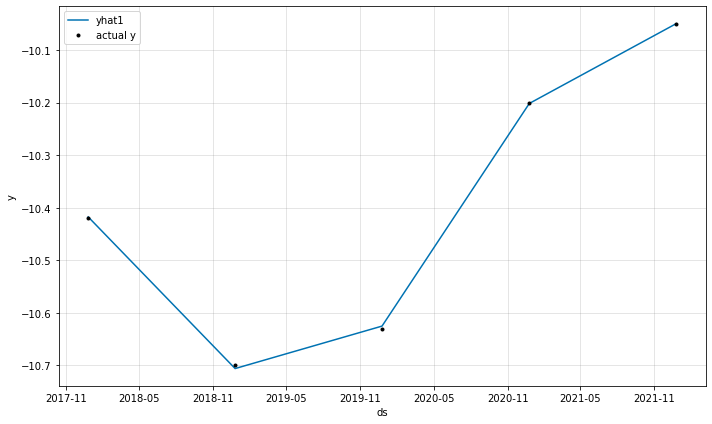

In [310]:
plot = n.plot(forecast)

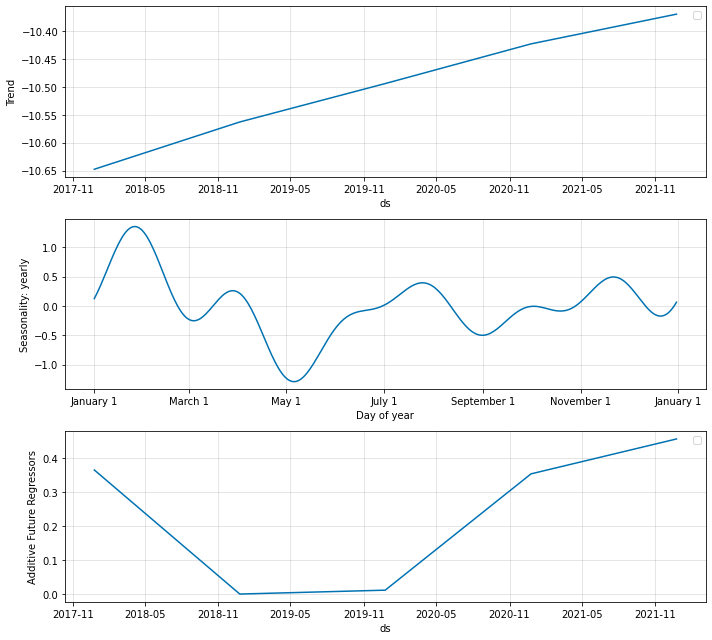

In [289]:
f = n.plot_components(forecast)